In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [15]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier, plot_importance
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("data/data.csv")
df.shape

(100, 5)

In [4]:
df.drop(["gradeof software"],axis=1, inplace = True)
df.head().T

,0,1,2,3,4
education,1,1,1,1,1
gender,1,1,1,1,1
questionnaire score(EQ),148,131,126,135,132
grade of questionnaire score(EQ),5,4,3,4,4


In [5]:
df.rename(columns={"questionnaire score(EQ)":"EQ","grade of questionnaire score(EQ)":"target"}, inplace = True)
df.head().T

,0,1,2,3,4
education,1,1,1,1,1
gender,1,1,1,1,1
EQ,148,131,126,135,132
target,5,4,3,4,4


In [6]:
X = df.drop("target", axis = 1)
y = df["target"]

In [7]:
X.shape

(100, 3)

In [8]:
y.shape

(100,)

In [9]:
X.head().T

,0,1,2,3,4
education,1,1,1,1,1
gender,1,1,1,1,1
EQ,148,131,126,135,132


____

## XGBoost Classifier  - StandardScaler

In [10]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((75, 3), (75,), (25, 3), (25,))

In [16]:
model= XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [18]:
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[6 0 0 0 0]
 [0 1 0 0 0]
 [0 0 9 0 0]
 [0 0 0 7 0]
 [0 0 0 0 2]]
1.0


___
## Gradient Boosting Classifier- Parameter Optimization

In [19]:
params = {'n_estimators': 1500, 'max_depth': 5, 'subsample': 0.5,
          'learning_rate': 0.01, 'min_samples_leaf': 1, 'random_state': 3}

clf = GradientBoostingClassifier(**params)

In [20]:
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [24]:
df.columns

Index(['education', 'gender', 'EQ', 'target'], dtype='object')

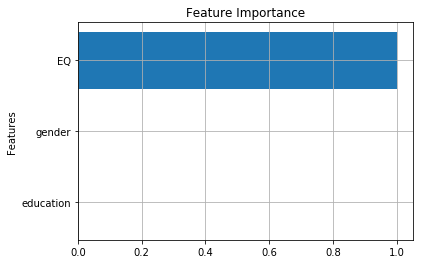

In [26]:
# display the relative importance of each attribute
relval = clf.feature_importances_

# horizontal bar plot of feature importance
pos = np.arange(3) + 0.5
plt.barh(pos, relval, align='center')
plt.title("Feature Importance")
plt.xlabel("")
plt.ylabel("Features")
plt.yticks(pos, ('education','gender','EQ'))
plt.grid(True)

In [27]:
correct = 0
incorrect = 0
for prediction, truth in zip(predictions, y_test):
    if prediction == truth:
        correct += 1
    elif prediction != truth:
        incorrect += 1
    else:
        print ("Evaluating performance for processed predictions:")
        break

In [28]:
print("correct:",correct)
print("incorrect:",incorrect)
print("accuracy score:", clf.score(X_test, y_test))

correct: 25
incorrect: 0
accuracy score: 1.0


In [29]:
y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[6 0 0 0 0]
 [0 1 0 0 0]
 [0 0 9 0 0]
 [0 0 0 7 0]
 [0 0 0 0 2]]
1.0


In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         2

   micro avg       1.00      1.00      1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25

